In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns

from textblob import TextBlob

In [2]:
df = pd.read_csv('../data/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv', 
                 sep='\t', encoding='utf8', error_bad_lines=False, low_memory=False)

b'Skipping line 784648: expected 15 fields, saw 22\nSkipping line 1173831: expected 15 fields, saw 22\nSkipping line 1470689: expected 15 fields, saw 22\n'


In [3]:
df = df.dropna()

In [4]:
df.shape

(5100209, 15)

In [5]:
rating_count = df['star_rating'].value_counts()

In [6]:
rating_count = rating_count.sort_index()

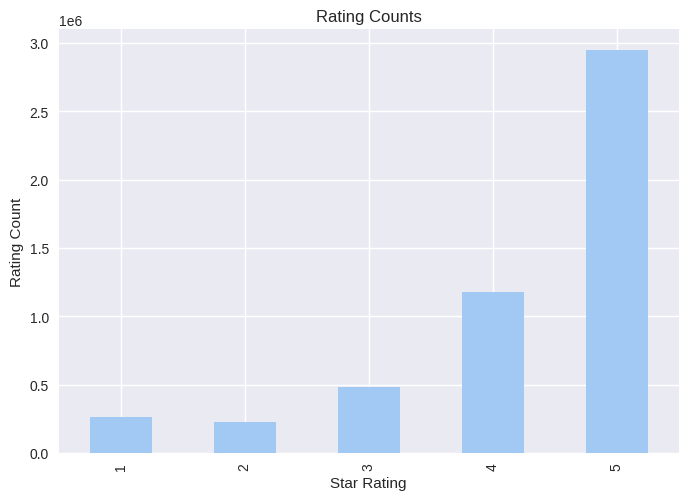

In [7]:
from matplotlib.colors import ListedColormap
rating_count.plot(kind='bar', colormap=ListedColormap(sns.color_palette("pastel", 2)))
plt.xlabel('Star Rating')
plt.ylabel('Rating Count')
plt.title('Rating Counts')
plt.show()

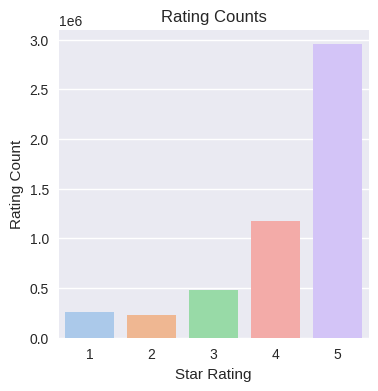

In [8]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=[1, 2, 3, 4, 5], y=rating_count.values, data=rating_count, palette='pastel')
ax.set_xlabel('Star Rating')
ax.set_ylabel('Rating Count')
ax.set_title('Rating Counts')
plt.show()

In [9]:
df[df['star_rating'] == '1']['review_body'].values[:10]

array(['From the time that Celine travels back until the end she becomes a loathsome character.  She is weak and written to be quite pathetic.  How she can so quickly fall in love with a cruel man (and he is cruel and rude until about 3/4 of the way through) is beyond me.  I was rooting for the villain to do away with them both.  I read some of the dialogue between the two love interests to my husband and we laughed at its absurdity.<br /><br />The writing style was very good but the plot and characters were not endearing in any way.  I would have rather had the female character just play along, quietly until she could return to her time instead of simpering and desperate.  This, to me, was not a romance but a twisted Stockholm syndrome fiction.<br /><br />Spend your money elsewhere.',
       'This work should not be put in the category that it is put into. It is NOT CLEAN!  And I wish there were better filters or standards.  No thanks',
       "We didn't purchase this item however we 

In [10]:
df[df['star_rating'] == '1']['review_headline'].values[:10]

array(['Completely absurd', 'No thanks', 'Free ipad apps',
       'Not the right book!', 'Not my cup of tea', 'A Big Disappointment',
       "Where's the End??????", 'About the book',
       'Horrible - hated this book', "Couldn't finish"], dtype=object)

In [11]:
df['product_title'].value_counts().head(10)

Fifty Shades of Grey (Fifty Shades, Book 1)        11872
The Hunger Games (Hunger Games Trilogy, Book 1)    11709
Gone Girl: A Novel                                  9437
Catching Fire (Hunger Games Trilogy, Book 2)        7983
Mockingjay (Hunger Games Trilogy, Book 3)           7428
Inferno: A Novel (Robert Langdon Book 4)            7045
Hopeless                                            5856
Fifty Shades Freed (Fifty Shades, Book 3)           5657
Fifty Shades Darker (Fifty Shades, Book 2)          5637
Safe Haven                                          5474
Name: product_title, dtype: int64

In [12]:
df['review_headline'].value_counts().head(10)

Great book    28596
Great read    22227
Good read     21341
Awesome       21208
Amazing       18583
Loved it!     17637
Great         16958
Excellent     15451
Great Book    15011
Loved it      14825
Name: review_headline, dtype: int64

In [13]:
df['subjectivity'] = df['review_body'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [20]:
df['polarity'] = df['review_body'].apply(lambda x: TextBlob(x).sentiment.polarity)

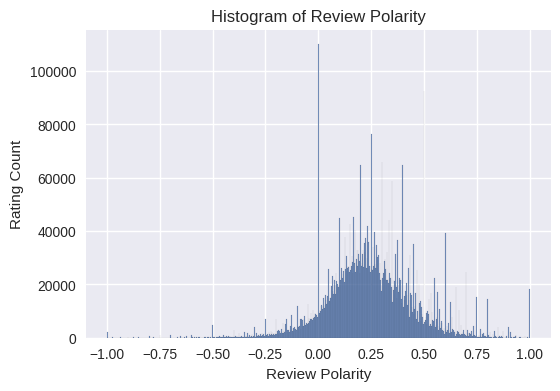

In [57]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=df, x=df['polarity'])
ax.set_xlabel('Review Polarity')
ax.set_ylabel('Rating Count')
ax.set_title('Histogram of Review Polarity')
plt.show()

In [24]:
df_1_star = df[df['star_rating'] == '1']
df_2_star = df[df['star_rating'] == '2']
df_3_star = df[df['star_rating'] == '3']
df_4_star = df[df['star_rating'] == '4']
df_5_star = df[df['star_rating'] == '5']

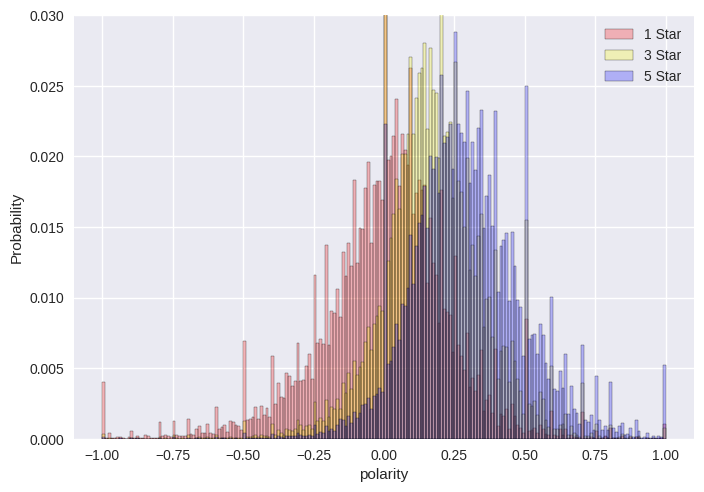

In [44]:
sns.histplot(data=df_1_star, x=df_1_star['polarity'], stat='probability', bins=200, label='1 Star', palette='pastel', color='red', alpha=0.25)
sns.histplot(data=df_3_star, x=df_3_star['polarity'], stat='probability', bins=200, label='3 Star', palette='pastel', color='yellow', alpha=0.25)
sns.histplot(data=df_5_star, x=df_5_star['polarity'], stat='probability', bins=200, label='5 Star', palette='pastel', color='blue', alpha=0.25)
plt.ylim([0, 0.03])
plt.legend()
plt.show()

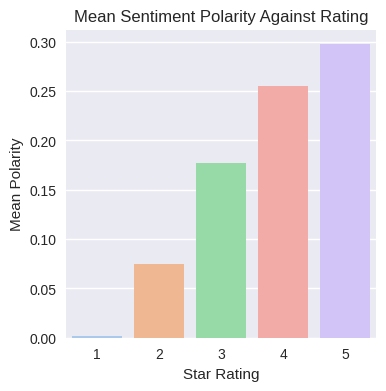

In [55]:
# Plot mean sentiment against rating 
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=[1, 2, 3, 4, 5], y=df.groupby("star_rating")["polarity"].mean(), data=df.groupby("star_rating")["polarity"].mean(), palette='pastel')
ax.set_xlabel('Star Rating')
ax.set_ylabel('Mean Polarity')
ax.set_title('Mean Sentiment Polarity Against Rating')
plt.show()